### **Impressionate Art SVM Baseline Model**

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from skimage.transform import resize
from skimage.io import imread
import time

# Unsure if the following are used:
#import cv2
#from tqdm import tqdm

In [2]:
# Mounting files to ur Google Drive.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Main Data Paths 
    ## Comment out the data path you're not using:
    
# DATADIR = './impressionist-classifier-data/training/training' # Laura's Path
DATADIR =  '/content/gdrive/MyDrive/UNIVERSITY/Year 4 Aero/APS360/APS360 Project/Impressionist-classifier-data-split' # Daniela's path

# Train and Validation Datasets
train_datadir = DATADIR + '/train'  #path which contains all the categories of train images
val_datadir = DATADIR + '/val'  #path which contains all the categories of val images

CATEGORIES = ['Cezanne','Degas','Gauguin','Hassam','Matisse','Monet','Pissarro','Renoir','Sargent','VanGogh']
IMG_SIZE=100

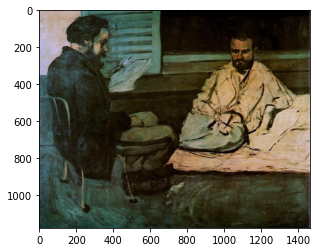

In [ ]:
# Displaying a sample image:

for category in CATEGORIES:
    path=os.path.join(train_datadir, category)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [4]:
def create_data(data_dir): # Input is data_dir = the path of the training or validation data
    data=[]
    target=[]

    for category in CATEGORIES:
        print(f'loading data... category : {category}')
        path=os.path.join(data_dir, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=imread(os.path.join(path,img))
                new_array=resize(img_array,(IMG_SIZE,IMG_SIZE,3))

                data.append(new_array.flatten())
                target.append(class_num)
            except Exception as e:
                print('passed')
                pass

    return data, target

In [5]:
# Creating the data

flat_train, target_train = create_data(train_datadir)
flat_val, target_val = create_data(val_datadir)

# Turning Train Data to np.arrays
train_data = np.array(flat_train)
train_target=np.array(target_train)

# Turning Validation Data to np.arrays
val_data = np.array(flat_val)
val_target=np.array(target_val)

loading data... category : Cezanne
loading data... category : Degas
loading data... category : Gauguin
loading data... category : Hassam
loading data... category : Matisse
loading data... category : Monet
loading data... category : Pissarro
loading data... category : Renoir
loading data... category : Sargent
loading data... category : VanGogh
loading data... category : Cezanne
loading data... category : Degas
loading data... category : Gauguin
loading data... category : Hassam
loading data... category : Matisse
loading data... category : Monet
loading data... category : Pissarro
loading data... category : Renoir
loading data... category : Sargent
loading data... category : VanGogh


In [ ]:
lenofimage = len(flat_train)
print(lenofimage)


2788


In [ ]:
#train_data = train_data/255.0
#train_target.shape

(590,)

In [6]:
# Training df conversion
df=pd.DataFrame(train_data) #dataframe
df['Target']=train_target
x_train=df.iloc[:,:-1] #input data - original classes
y_train=df.iloc[:,-1] #output data - labelled as 0-9

# Validation df conversion 
df=pd.DataFrame(val_data) #dataframe
df['Target']=val_target
x_val=df.iloc[:,:-1] #input data - original classes
y_val=df.iloc[:,-1] #output data - labelled as 0-9

In [7]:
# SVC - Training Model
from sklearn.svm import SVC
svc = SVC(C = 100, kernel = 'rbf')

start_time = time.time()
svc.fit(x_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

Total time elapsed: 315.38 seconds


In [10]:
y2 = svc.predict(x_val) 
print("Prediction is: ", CATEGORIES[y2[0]]) 

Prediction is:  VanGogh


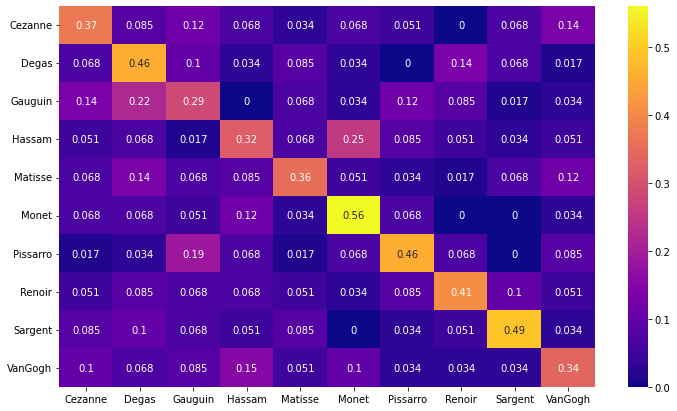

In [14]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = y2
y_true = y_val

# constant for classes
CATEGORIES = ['Cezanne','Degas','Gauguin','Hassam','Matisse','Monet','Pissarro',
              'Renoir','Sargent','VanGogh']

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in CATEGORIES],
                     columns = [i for i in CATEGORIES])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, cmap="plasma",annot=True)
plt.savefig('output.png')

In [15]:
# Accuracy Test 1
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_val,y2))

Accuracy on unknown data is 0.40508474576271186


In [ ]:
 #Accuracy Test 2
accuracy = svc.score(x_val, y_val)

print('Accuracy: {}'.format(accuracy))

Accuracy: 0.40508474576271186
